# Hotel Reservation Classification


This data set consists of 36275 observations and holds booking from 2017 to 2018. It has 16 variables which include reservation and arrival date, length of stay, canceled or not, the number of adults, children, no_of_weekend_nights, room_type_reserved, lead_time, etc.

There are many aspects considered when choosing a hotel. The main idea is to find the appropriate prediction model for predicting hotel reservation cancellations which finds the finest explaining variables for customer cancellations. This Hotel reservation Cancellation model can be useful not only for the vacationer but for the hotels’ owners.


1. Booking_ID: unique identifier of each booking
2. no_of_adults: Number of adults
3. no_of_children: Number of Children
4. no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
5. no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
6. type_of_meal_plan: Type of meal plan booked by the customer:
7. required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
8. room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
9. lead_time: Number of days between the date of booking and the arrival date
10. arrival_year: Year of arrival date
11. arrival_month: Month of arrival date
12. arrival_date: Date of the month
13. market_segment_type: Market segment designation.
14. repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
15. no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
16. no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
17. avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
18. no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
19. booking_status: Flag indicating if the booking was canceled or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
hotel_data = pd.read_csv('Hotel Reservations.csv')
hotel_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
print("Dataset size")
print("Rows {} Columns {}".format(hotel_data.shape[0], hotel_data.shape[1]))

Dataset size
Rows 36275 Columns 19


In [4]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
hotel_data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
hotel_data.duplicated().sum()

0

In [7]:
hotel_data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
hotel_data.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [9]:
hotel_data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
hotel_data["type_of_meal_plan"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [11]:
hotel_data["room_type_reserved"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [12]:
hotel_data["market_segment_type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [13]:
hotel_data["booking_status"].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [14]:
hotel_data = hotel_data.drop(columns = 'Booking_ID')

In [15]:
hotel_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Univariate Analysis

<AxesSubplot: xlabel='market_segment_type', ylabel='count'>

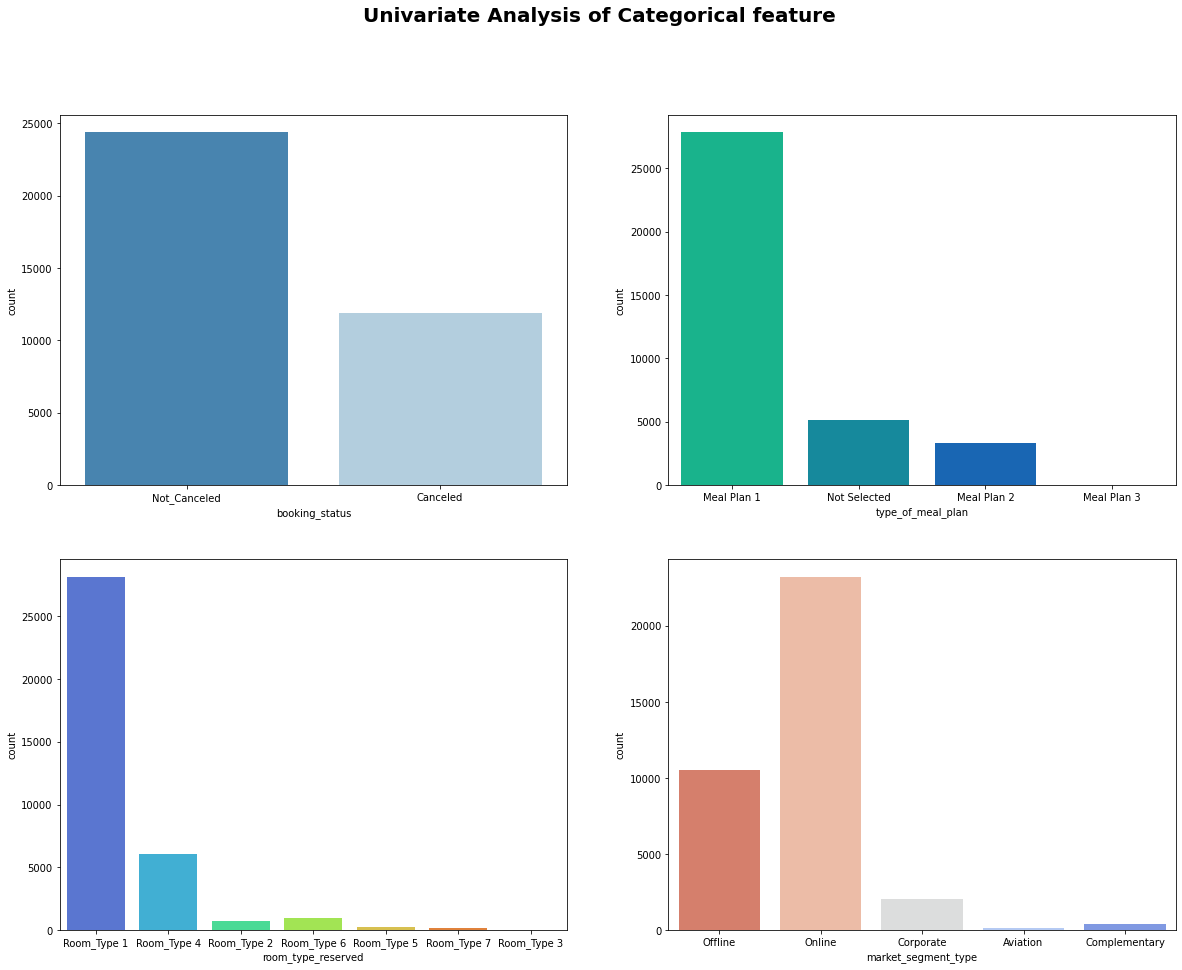

In [16]:
plt.figure(figsize=(20, 15))
plt.suptitle("Univariate Analysis of Categorical feature", fontsize=20, fontweight='bold')

plt.subplot(2, 2, 1)
sns.countplot(data = hotel_data, x = "booking_status", palette= "Blues_r")

plt.subplot(2, 2, 2)
sns.countplot(data = hotel_data, x = "type_of_meal_plan", palette= "winter_r")

plt.subplot(2, 2, 3)
sns.countplot(data = hotel_data, x = "room_type_reserved", palette= "turbo")

plt.subplot(2, 2, 4)
sns.countplot(data = hotel_data, x = "market_segment_type", palette= "coolwarm_r")

<AxesSubplot: title={'center': 'Number of booking by Year'}, xlabel='arrival_year', ylabel='count'>

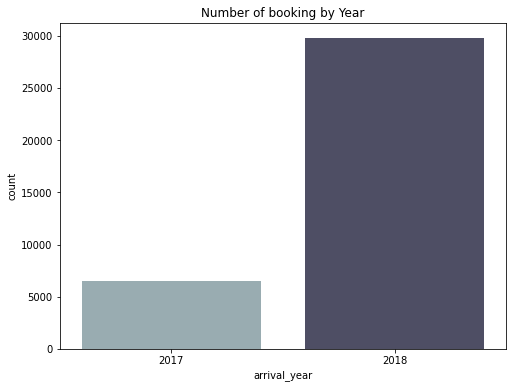

In [17]:
plt.figure(figsize=(8, 6))
plt.title("Number of booking by Year")
sns.countplot(data = hotel_data, x = "arrival_year", palette= "bone_r")

Above plot shows us that in 2018 number of bookings are higher.

<AxesSubplot: title={'center': 'Cancellation by months'}, xlabel='arrival_month', ylabel='count'>

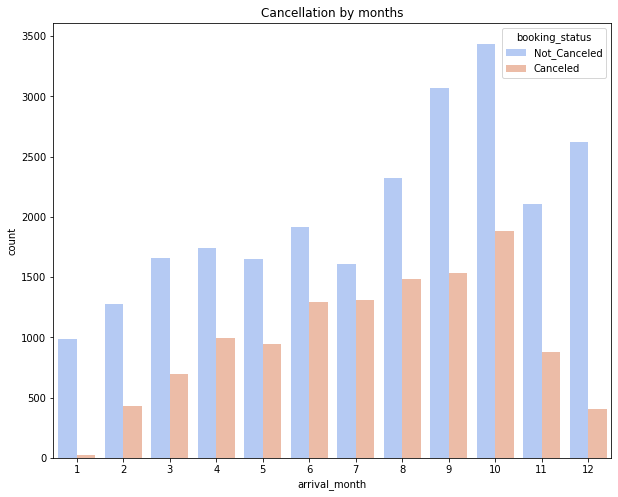

In [18]:
plt.figure(figsize=(10, 8))
plt.title("Cancellation by months")
sns.countplot(data = hotel_data, x = "arrival_month", hue = "booking_status", palette= "coolwarm")

From the above plot of arrival month we can observe that in month of november there are the highest number of cancellation as well as highest number of not cancelled.

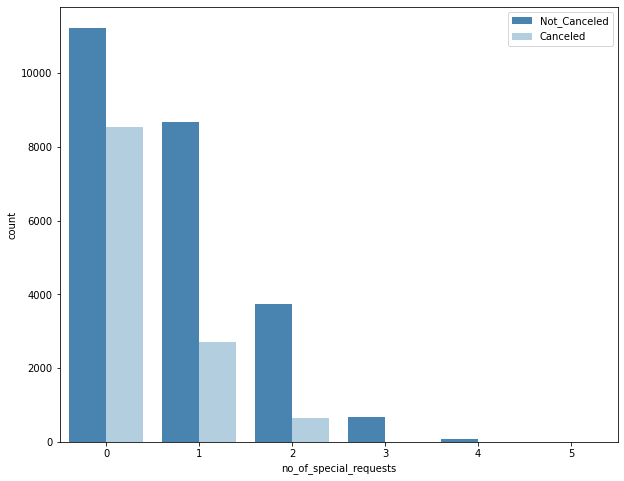

In [19]:
plt.figure(figsize=(10, 8))
sns.countplot(data = hotel_data, x = "no_of_special_requests",
              hue = "booking_status", palette = "Blues_r")
plt.legend(loc= "upper right")

# Bivariate Analysis

<AxesSubplot: xlabel='booking_status', ylabel='lead_time'>

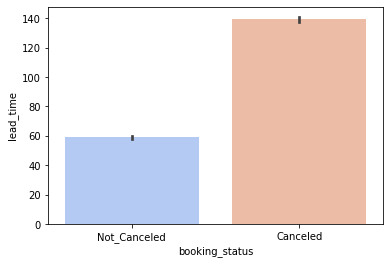

In [20]:
sns.barplot(data = hotel_data, x = "booking_status", y = "lead_time", palette = "coolwarm")

From the above plot we can say that as the lead time increases the possibility of cancellation increases.

<AxesSubplot: xlabel='room_type_reserved', ylabel='avg_price_per_room'>

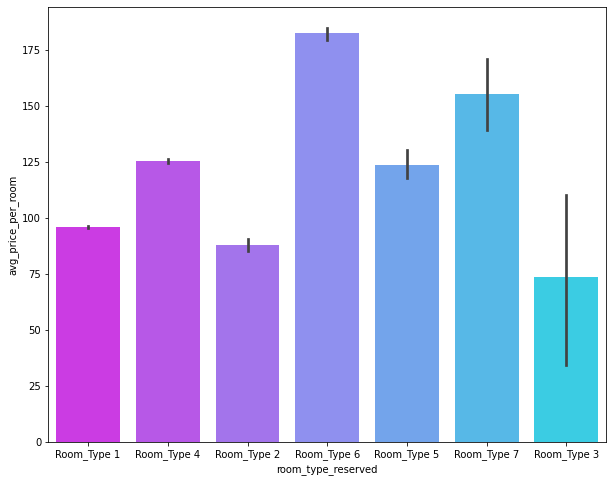

In [21]:
plt.figure(figsize=(10, 8))
sns.barplot(data = hotel_data, x = "room_type_reserved", y = "avg_price_per_room", palette = "cool_r")

The above plot shows us that Room type 6 is most expensive one and room type 3 is the cheapest one.

# Correlation Heatmap

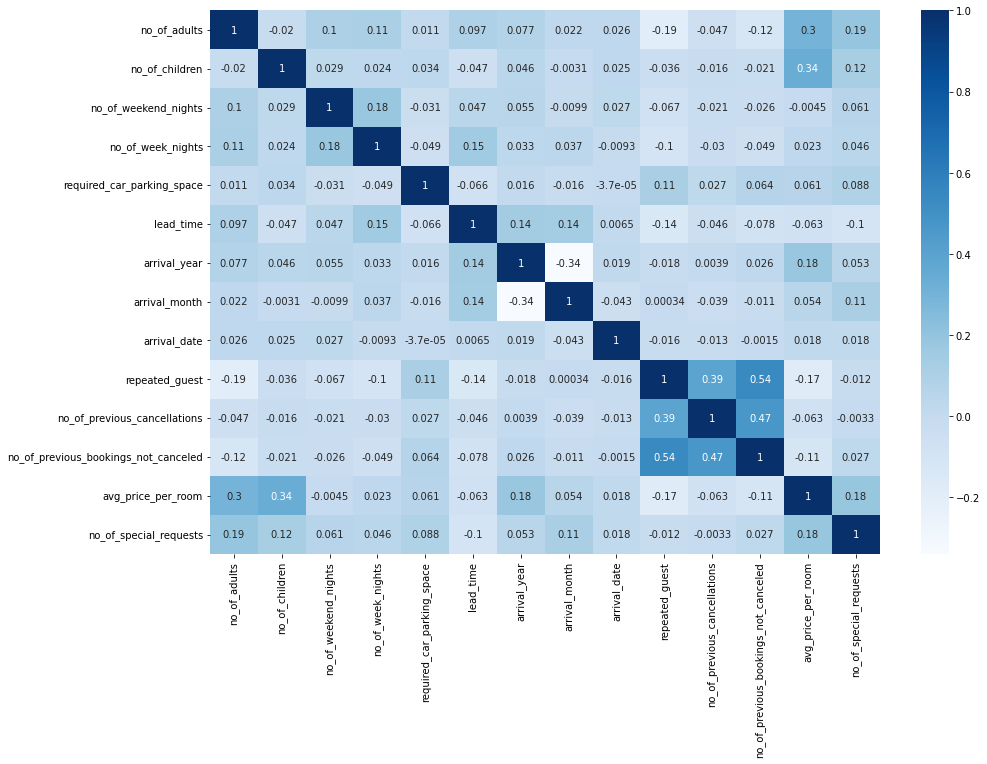

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(hotel_data.corr(), annot= True, cmap = "Blues")
plt.show()

In this above correlation heatmap we can observe that:

1. no_of_previous_booking_canceled vs repeated_guests 0.54
2. room_type_reserved vs avg_price_per_room 0.47
3. no_of_previous_cancellations vs no_previous_booking_not_canceled 0.47
4. no_of_previous_cancellations vs repeated_guests 0.39

# Encoding the labels

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

hotel_data["type_of_meal_plan"] = encoder.fit_transform(hotel_data["type_of_meal_plan"])
hotel_data["room_type_reserved"] = encoder.fit_transform(hotel_data["room_type_reserved"])
hotel_data["market_segment_type"] = encoder.fit_transform(hotel_data["market_segment_type"])
hotel_data["booking_status"] = encoder.fit_transform(hotel_data["booking_status"])

In [24]:
hotel_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


# Splitting train and test data

In [25]:
X = hotel_data.iloc[:, :-1]
y = hotel_data.iloc[:, -1]

In [26]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0


In [27]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: booking_status, dtype: int32

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
13555,2,0,2,3,3,0,0,59,2018,5,21,4,0,0,0,116.10,1
8356,2,0,2,0,3,0,0,30,2018,9,25,4,0,0,0,89.10,0
31335,2,0,0,2,0,0,0,19,2018,6,22,2,0,0,0,100.00,0
10368,2,0,0,3,3,0,0,66,2018,3,16,4,0,0,0,73.50,0
29655,2,0,2,3,0,0,3,93,2018,4,17,4,0,0,0,99.45,1


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting logistic regression on train data

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log_reg = LogisticRegression(fit_intercept= True, max_iter= 1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
log_reg.coef_

array([[-0.0337087 ,  0.01208324, -0.10944625, -0.05734818, -0.08879006,
         0.27676281,  0.12280517, -1.18117293, -0.20656482,  0.12119744,
        -0.0288573 , -0.79539639,  0.2624412 , -0.06568899,  0.08076578,
        -0.65061597,  1.07348724]])

In [35]:
log_reg.intercept_

array([1.21952977])

In [36]:
pred_prob = log_reg.predict_proba(X_train)
pred_prob

array([[0.36062472, 0.63937528],
       [0.40766728, 0.59233272],
       [0.04889065, 0.95110935],
       ...,
       [0.0134366 , 0.9865634 ],
       [0.92946764, 0.07053236],
       [0.51138971, 0.48861029]])

In [37]:
pred = log_reg.predict(X_test)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
confusion_matrix(y_test, pred)

array([[2428, 1533],
       [ 766, 7244]], dtype=int64)

In [40]:
print("Accuracy of logistic regression:", accuracy_score(y_test, pred)*100)

Accuracy of logistic regression: 80.79525520006683


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
Dt = DecisionTreeClassifier()

In [43]:
Dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
predict = Dt.predict(X_test)
predict

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
from sklearn.metrics import accuracy_score

print("Accuracy score of Decision Tree: ", accuracy_score(y_test, Dt.predict(X_test)) * 100)

Accuracy score of Decision Tree:  86.49235652827667


# Random forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [47]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
accuracy = accuracy_score(rfc.predict(X_test), y_test) * 100
print("Accuracy of random forest classifier:", accuracy)

Accuracy of random forest classifier: 90.21802689833764


# Support Vector Classifier

In [49]:
from sklearn.svm import SVC

svc_model = SVC(kernel='linear', random_state= 0)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [50]:
y_pred_svc = svc_model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred_svc)
cm

array([[2358, 1603],
       [ 727, 7283]], dtype=int64)

In [52]:
print ("Accuracy of SVC:", accuracy_score(y_test, y_pred_svc)*100)

Accuracy of SVC: 80.53629604878456


# K-Nearest Neighbor Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [54]:
acc_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy Score of KNN is", acc_knn*100)

Accuracy Score of KNN is 84.57940021719155


# Conclusion: 

1. This dataset is a supervised classification dataset. 


2. In this dataset I have used many popular Machine Learning algorithms like Logistic Regression, Decision Tree, Random Forest Classifier, SVM, and KNN. To predict the cancellation chances.


3. Random forest has the best accuracy among all algorithm that We tried from all the evaluation matrix to predict hotel cancellation classification case, we see that Random Forest Classifier has the best accuracy when it comes to predicting hotel cancellation based on certain features (90.11%).